# Домашнее задание №3

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

Таблица Indian liver pations records.

In [3]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [21]:
data['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


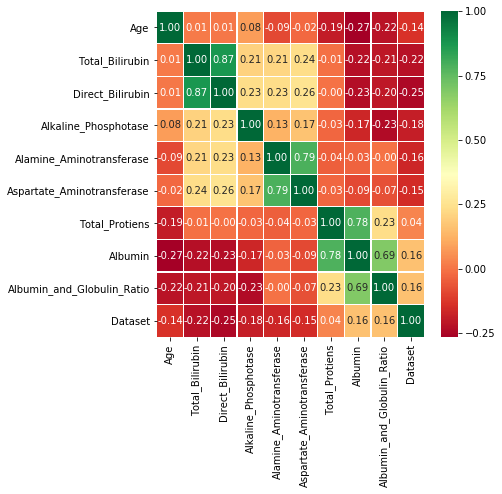

In [4]:
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [5]:
model = LinearRegression()
result = model.fit(np.array(data['Total_Bilirubin']).reshape(-1,1), data['Direct_Bilirubin'])
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.1811674367972489
slope: [0.39557996]


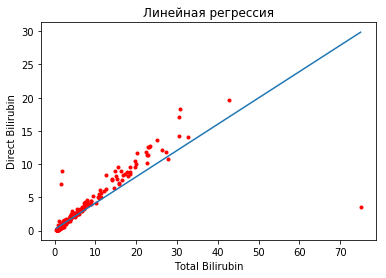

In [6]:
plt.xlabel('Total Bilirubin')
plt.ylabel('Direct Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(data['Total_Bilirubin']), max(data['Total_Bilirubin']), 100)
y = model.coef_*x + model.intercept_
plt.plot(data['Total_Bilirubin'], data['Direct_Bilirubin'], 'r.')
plt.plot(x,y)
plt.show()

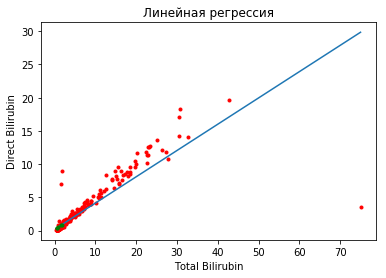

In [7]:
plt.xlabel('Total Bilirubin')
plt.ylabel('Direct Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(data['Total_Bilirubin']), max(data['Total_Bilirubin']), 100)
y = model.coef_*x + model.intercept_
plt.plot(data['Total_Bilirubin'], data['Direct_Bilirubin'], 'r.')
plt.plot(x,y)
a=data['Total_Bilirubin'].iloc[14:19]
b=model.predict(np.array(data['Total_Bilirubin'].iloc[14:19]).reshape(-1,1))
plt.plot(a,b, 'g.')
plt.show()

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

In [32]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [39]:
data1=data.dropna(subset=['Albumin_and_Globulin_Ratio'])
x = np.vstack([np.array(data1['Albumin_and_Globulin_Ratio']),np.array(data1['Direct_Bilirubin'])]).T
y = np.array(data1['Dataset'])
model = LinearRegression().fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.1795319843549186
slope: [ 0.16765337 -0.03569731]


In [40]:
print('Предсказание модели: ', model.predict(x[20:25]))
print('Табличные значения: ', y[20:25])

Предсказание модели:  [1.23604403 1.21695217 1.22332809 1.24442669 1.48255125]
Табличные значения:  [1 1 1 1 2]


Посчитать квартили для всех колонок. 

In [41]:
data.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

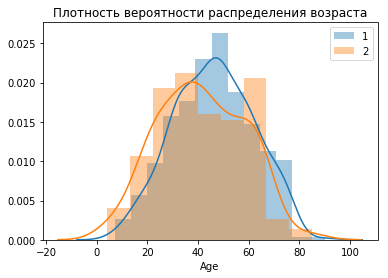

In [43]:
sns.distplot(data[data['Dataset']==1]['Age'])
sns.distplot(data[data['Dataset']==2]['Age'])
plt.title('Плотность вероятности распределения возраста')
plt.legend(['1', '2'])
plt.show()

In [56]:
print('Среднее: 1- ', data[data['Dataset']==1]['Age'].mean())
print('Среднее: 2- ', data[data['Dataset']==2]['Age'].mean())
print('Квартиль 0,5: 1- ', data[data['Dataset']==1]['Age'].quantile(.5)) 
print('Квартиль 0,5: 2- ', data[data['Dataset']==2]['Age'].quantile(.5)) 

Среднее: 1-  46.15384615384615
Среднее: 2-  41.23952095808383
Квартиль 0,5: 1-  46.0
Квартиль 0,5: 2-  40.0


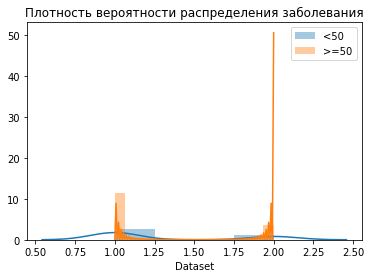

In [44]:
sns.distplot(data[data['Age']<50]['Dataset'])
sns.distplot(data[data['Age']>=50]['Dataset'])
plt.title('Плотность вероятности распределения заболевания')
plt.legend(['<50', '>=50'])
plt.show()

In [57]:
print('Среднее: <50 - ', data[data['Age']<50]['Dataset'].mean())
print('Среднее: >= 50 - ', data[data['Age']>=50]['Dataset'].mean())
print('Квартиль 0,5: <50 - ', data[data['Age']<50]['Dataset'].quantile(.5)) 
print('Квартиль 0,5: >= 50 - ', data[data['Age']>=50]['Dataset'].quantile(.5)) 

Среднее: <50 -  1.3172804532577904
Среднее: >= 50 -  1.2391304347826086
Квартиль 0,5: <50 -  1.0
Квартиль 0,5: >= 50 -  1.0


Считать квартили для дискретных величин - достаточно бессмысленно.


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [58]:
sample_=data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(sample_, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

p-value < 0,05, а значит, выборка отличается от генеральной совокупности.

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [59]:
sample1=data[data['Dataset']==1]['Total_Bilirubin']
sample2=data[data['Dataset']==2]['Total_Bilirubin']
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

Величина статистики велика, p-value < 0,05, значит, выборки различаются.

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [60]:
sample1=data[data['Age']<=30]['Dataset']
sample2=data[(data['Age']>30)&(data['Age']<=55)]['Dataset']
sample3=data[data['Age']>55]['Dataset']
stats.f_oneway(sample1,sample2,sample3)

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

p-value < 0,05, а значит, три выборки различаются. Как и в реальности, разные возрастные группы имеют разную предрасположенность к заболеваниям.

Вопросы задавать на почту yustiks@gmail.com